In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from scipy.integrate import quad
from sklearn.preprocessing import PolynomialFeatures

## Kernel PCA

In [2]:
from numpy.linalg import eig
X = pd.read_csv("PCA_LDA_circles.csv").to_numpy()
scaler = PolynomialFeatures(degree=2)
Φ = scaler.fit_transform(X)
K = Φ.dot(Φ.T)
rows = X.shape[0]
# Find centering matrix
C = np.identity(rows) - (1/rows) * np.ones((rows,rows))


In [3]:
# Calculate Q
Q = (1/rows) * K.dot(C).dot(K)

# Calculate eigenvalue and eigenvectors of Q 
eigen_val, eigen_vect = eig(Q)
index_of_largest_eigen = np.argmax(eigen_val)

# Grab alpha
alpha = eigen_vect[index_of_largest_eigen]
alpha = np.reshape(alpha, (len(alpha), 1))

Xr = K.dot(alpha)

/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


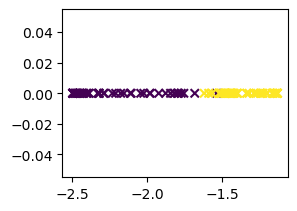

In [4]:
y = pd.read_csv("PCA_LDA_labels.csv").to_numpy()
plt.subplot(222)
plt.scatter(Xr[:,0], np.zeros((X.shape[0], 1)), c=y, marker='x')
plt.show()

# Kernel LDA

In [5]:
X = pd.read_csv("PCA_LDA_circles.csv").to_numpy()
scaler = PolynomialFeatures(degree=2)
Φ = scaler.fit_transform(X)
K = Φ.dot(Φ.T)
Φ_0 = scaler.fit_transform(X[:50, :])
Φ_1 = scaler.fit_transform(X[-50:, :])
K_0 = Φ.dot(Φ_0.T)
K_1 = Φ.dot(Φ_1.T)
Δ = (K_0 - K_1.dot(np.ones((50,1))))
C = np.eye(50) - (1/50)*np.ones((50,50))
S1 = Δ.dot(np.transpose(Δ))
S2 = K_0.dot(C).dot(np.transpose(K_0)) + K_1.dot(C).dot(np.transpose(K_1)) + 0.001*np.eye(99)
Q = np.linalg.inv(S2).dot(S1)
eigen_val, eigen_vect = eig(Q)
index_of_largest_eigen = np.argmax(eigen_val)
# Grab alpha
alpha = eigen_vect[index_of_largest_eigen]
alpha = np.reshape(alpha, (len(alpha), 1))
Xlr = K.dot(alpha)


/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


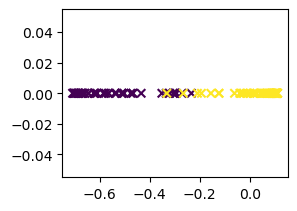

In [6]:
y = pd.read_csv("PCA_LDA_labels.csv").to_numpy()
plt.subplot(222)
plt.scatter(Xlr[:,0], np.zeros((X.shape[0], 1)), c=y, marker='x')
plt.show()